<a href="https://colab.research.google.com/github/Harsha1569/DSP_Lab/blob/main/EE313_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem** **1**.

In [2]:
import numpy as np
import IPython
import scipy
import math
import pandas as pd
import io
from IPython.display import Audio, display
from scipy.signal import chirp, spectrogram
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams
from scipy import signal as sp
from scipy.io import wavfile
from scipy.fftpack import fft
from scipy.signal import find_peaks



a = 1
pi = np.pi


%matplotlib inline
plt.style.use(['seaborn-notebook'])
plt.rcParams.update({
    "font.serif": ["cm"],
    "mathtext.fontset": "cm",
    "figure.figsize": (15, 8),
    "axes.labelsize": 15,
    "font.size": 8})
!pip install control

import control

     |████████████████████████████████| 339 kB 37.0 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=d9004ac1f854db8c91a93baf71a910e5313f03ada3209ebe49335ae86fe09ac6
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control


Part 1 & 2:

In [4]:
Fs=720
T=1/Fs
Omega_p=100*2*np.pi
Omega_s=200*2*np.pi
delp= 1
dels= 39

omega_p=Omega_p/Fs
omega_s=Omega_s/Fs
Omega_p1=(2/T)*np.tan(omega_p/2)
Omega_s1=(2/T)*np.tan(omega_s/2)

N, Omega_c=sp.buttord(Omega_p1, Omega_s1, delp, dels, analog=True)
n, d = sp.butter(N, Omega_c, btype='low', analog=True, output='ba')
num, denom =sp.bilinear(n, d, fs=Fs)

print('H(z) = {}'.format(control.TransferFunction(num, denom, dt=True)))

H(z) = 
0.002857 z^6 + 0.01714 z^5 + 0.04285 z^4 + 0.05714 z^3 + 0.04285 z^2 + 0.01714 z + 0.002857
-------------------------------------------------------------------------------------------
          z^6 - 2.305 z^5 + 2.778 z^4 - 1.934 z^3 + 0.8179 z^2 - 0.1937 z + 0.02



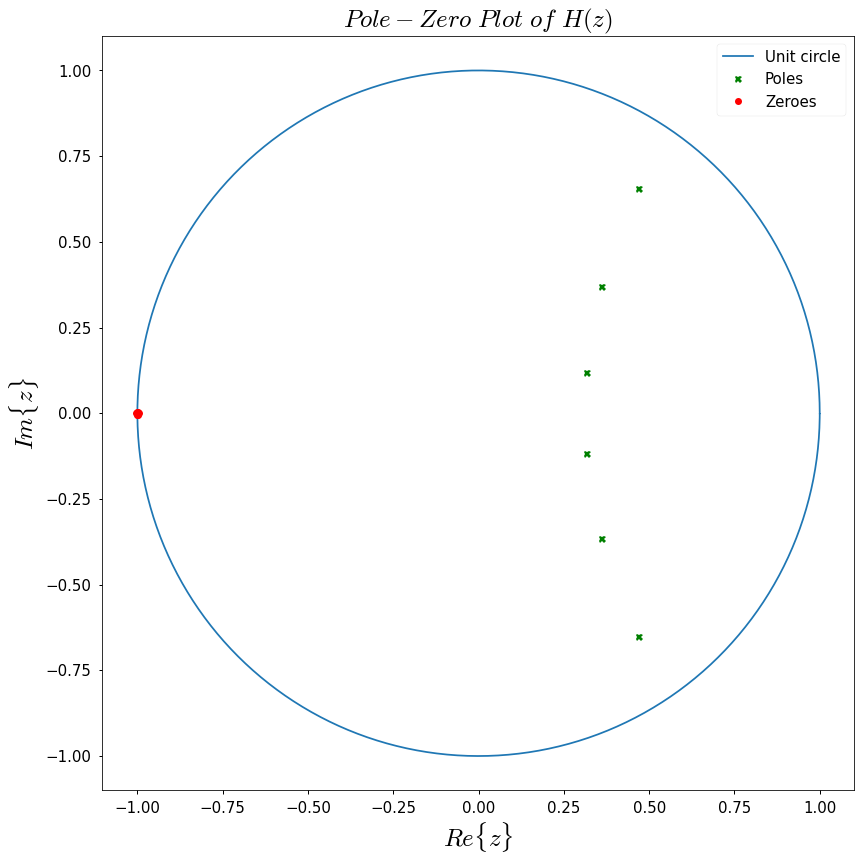

In [5]:
zeroes, poles, gain =sp.tf2zpk(num, denom)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('fig1.png')





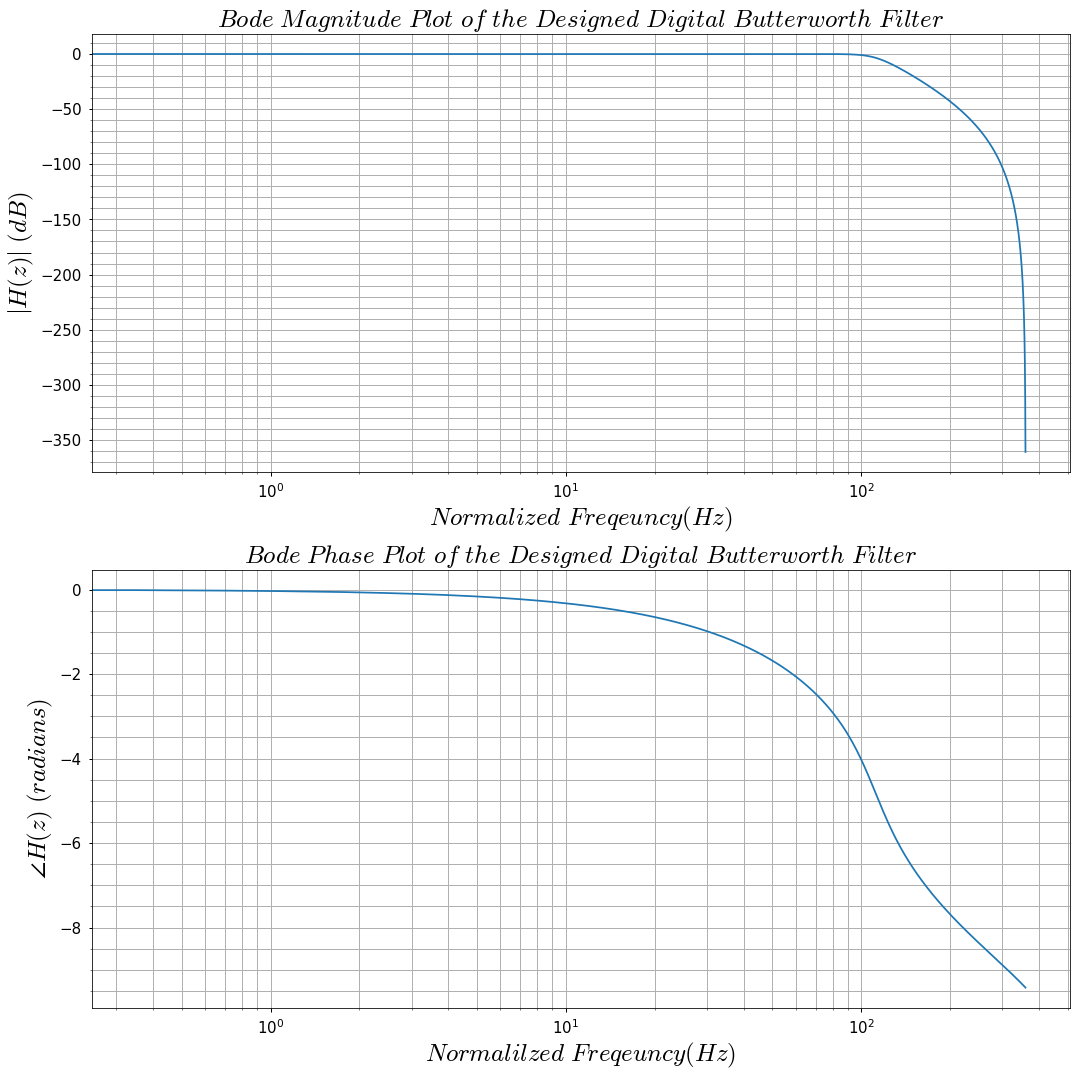

In [6]:
freq, mag = sp.freqz(num, denom, 1024)

title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Butterworth\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), 20*np.log10(np.abs(mag)))
    else:
      axs[row].semilogx(freq*(Fs/(2*np.pi)), np.unwrap(np.angle(mag))) 

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freq, mag, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freq, mag, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

fig.savefig('fig2.png')



/usr/local/lib/python3.7/dist-packages/scipy/signal/filter_design.py:685: UserWarning: The group delay is singular at frequencies [3.135, 3.139], setting to 0
  format(", ".join("{0:.3f}".format(ws) for ws in w[singular]))
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


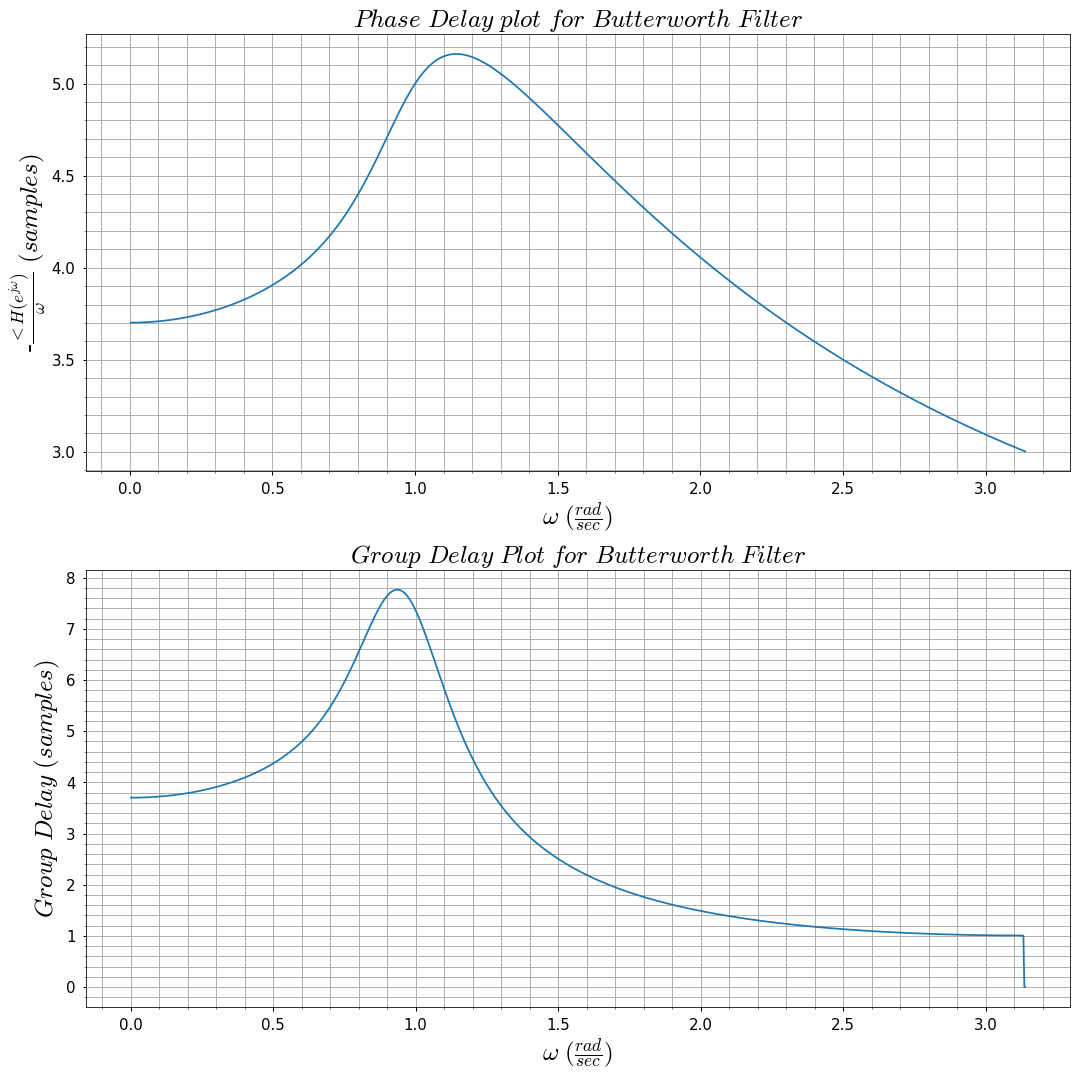

In [7]:
freq, mag = sp.freqz(num, denom, 1024)

w, gd = sp.group_delay((num, denom), 1024)

title = ['$Phase\ Delay\ plot\ for\ Butterworth\ Filter$', '$Group\ Delay\ Plot\ for\ Butterworth\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].plot(freq, -np.unwrap(np.angle(mag))/freq)
    else:
      axs[row].plot(w,gd)

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freq, mag, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'-$\frac{<H(e^{j\omega})}{\omega}\ (samples)$', row=0)
plot_signal(w, gd, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'$Group\ Delay\ (samples)$', row=1)

fig.savefig('But_delay.png')


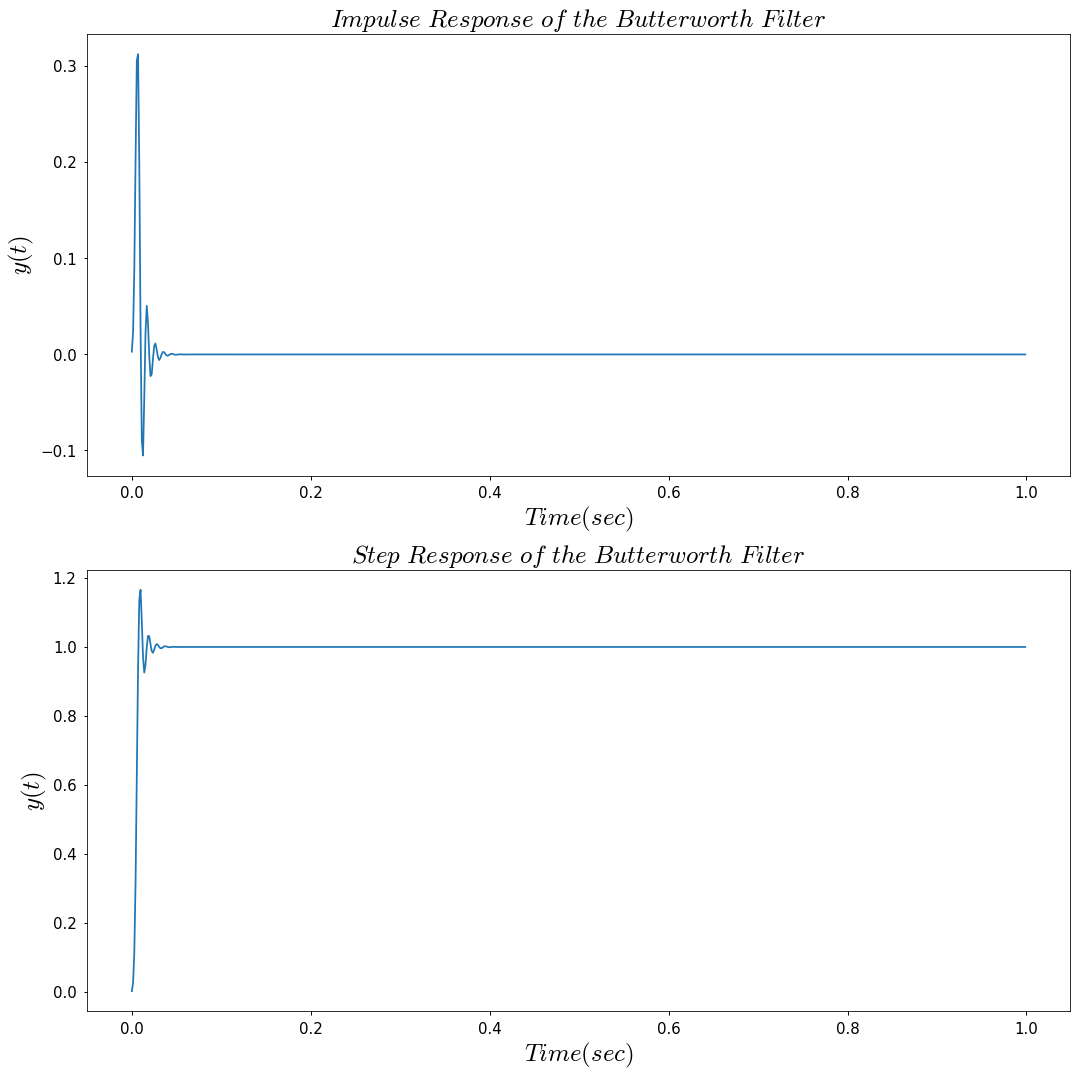

In [8]:
n=np.arange(0, Fs)
t=n/Fs
title_i= ['$Impulse\ Response\ of\ the\ Butterworth\ Filter$',
          '$Step\ Response\ of\ the\ Butterworth\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].plot(x, y)
    axs[row].set_title(title_i[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

impulse=np.hstack((np.array([1]), np.zeros((Fs-1))))
y1=sp.lfilter(num, denom, impulse)
step=np.ones((Fs))
y2=sp.lfilter(num, denom, step)
plot_signal(t, y1, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=0)
plot_signal(t, y2, xaxis_label=r'$Time (sec)$', yaxis_label=r'$y(t)$', row=1)

fig.savefig('fig3.png')

In [9]:
Fs=720
T=1/Fs
Omega_p=100*2*np.pi
Omega_s=200*2*np.pi
delp= a
dels= 39
omega_p=Omega_p/Fs
omega_s=Omega_s/Fs
Omega_p1=(2/T)*np.tan(omega_p/2)
Omega_s1=(2/T)*np.tan(omega_s/2)
N, Omega_c=sp.cheb1ord(Omega_p1, Omega_s1, delp, dels, analog=True)
n, d = sp.cheby1(N, delp, Omega_c, btype='low', analog=True, output='ba')
nu, dn=sp.bilinear(n, d, fs=Fs)

print('H(z) = {}'.format(control.TransferFunction(nu, dn, dt=True)))


H(z) = 
0.006282 z^4 + 0.02513 z^3 + 0.03769 z^2 + 0.02513 z + 0.006282
---------------------------------------------------------------
        z^4 - 2.535 z^3 + 2.946 z^2 - 1.736 z + 0.4379



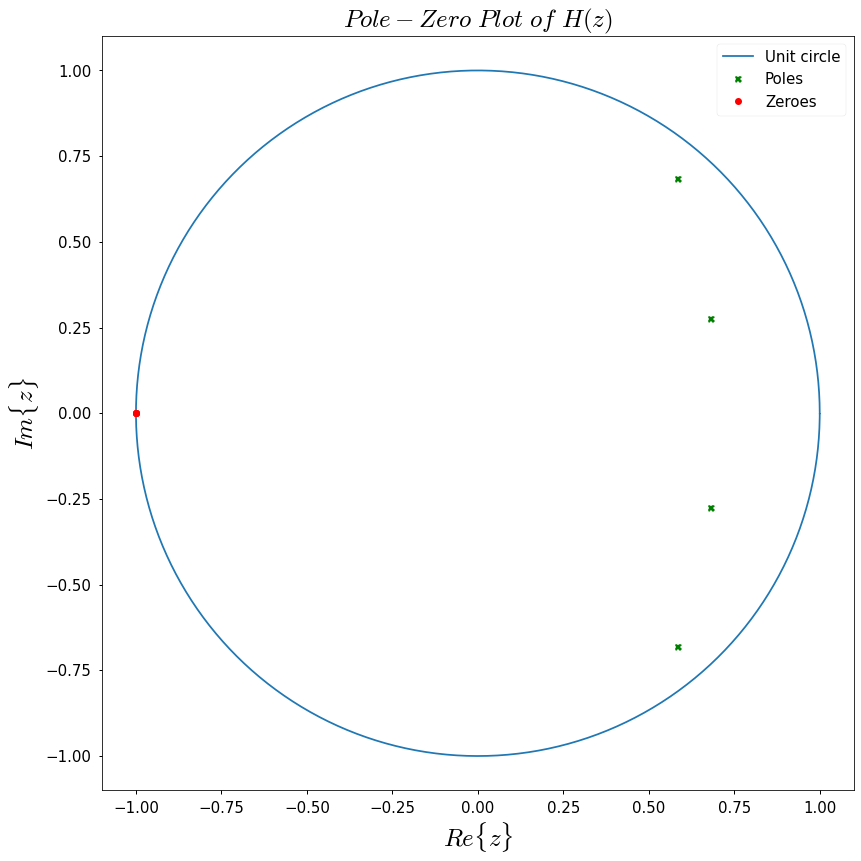

In [10]:
zeroes, poles, gain =sp.tf2zpk(nu, dn)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('fig7.png')

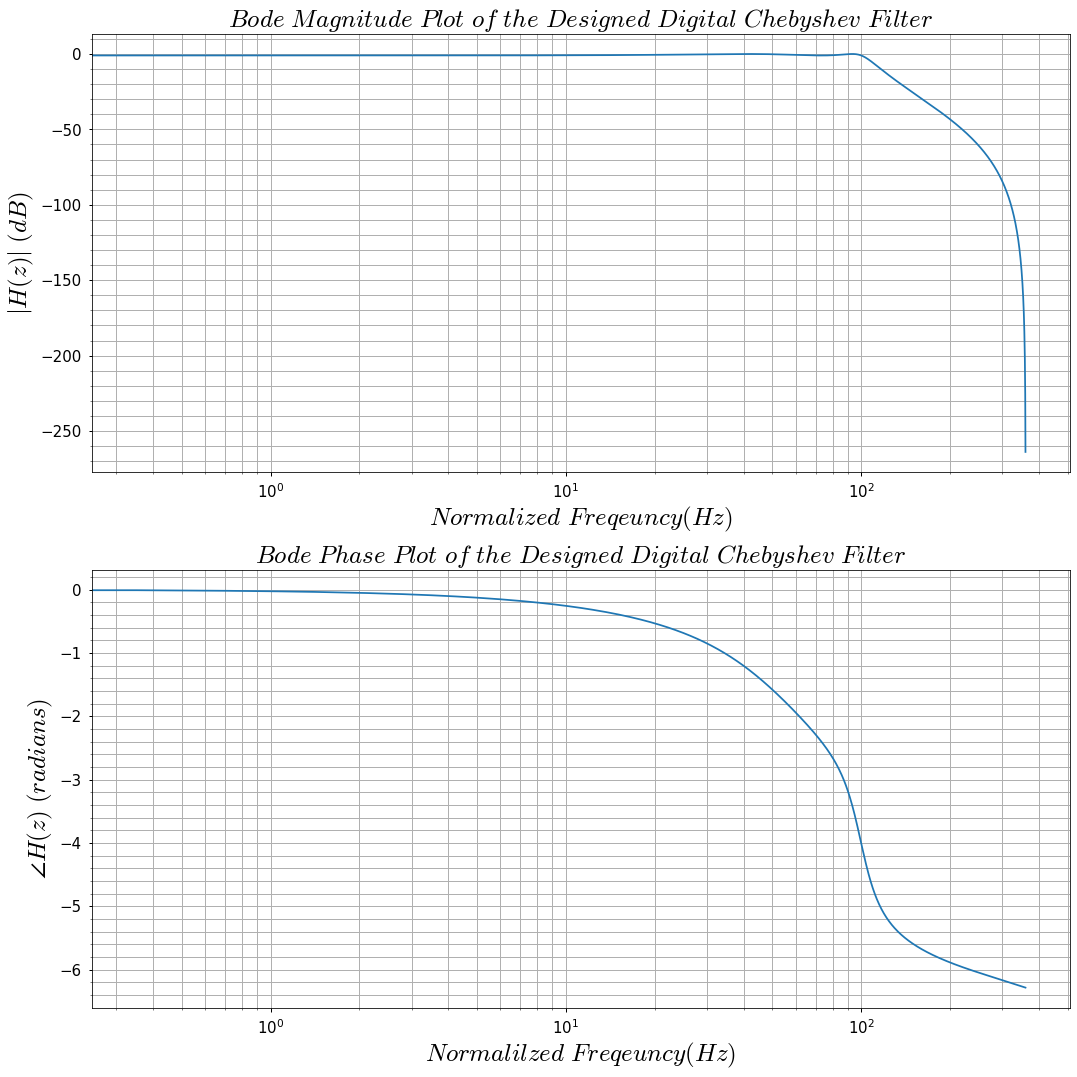

In [11]:
freqs, mags = sp.freqz(nu, dn, 1024)

title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ Chebyshev\ Filter$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ Chebyshev\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].semilogx(freqs*(Fs/(2*np.pi)), 20*np.log10(np.abs(mags)))
    else:
      axs[row].semilogx(freqs*(Fs/(2*np.pi)), np.unwrap(np.angle(mags))) 

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freqs, mags, xaxis_label=r'$Normalized\ Freqeuncy(Hz)$', yaxis_label=r'$|H(z)|\ (dB)$', row=0)
plot_signal(freqs, mags, xaxis_label=r'$Normalilzed\ Freqeuncy(Hz)$', yaxis_label=r'$\angle H(z)\ (radians)$', row=1)

fig.savefig('fig8.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


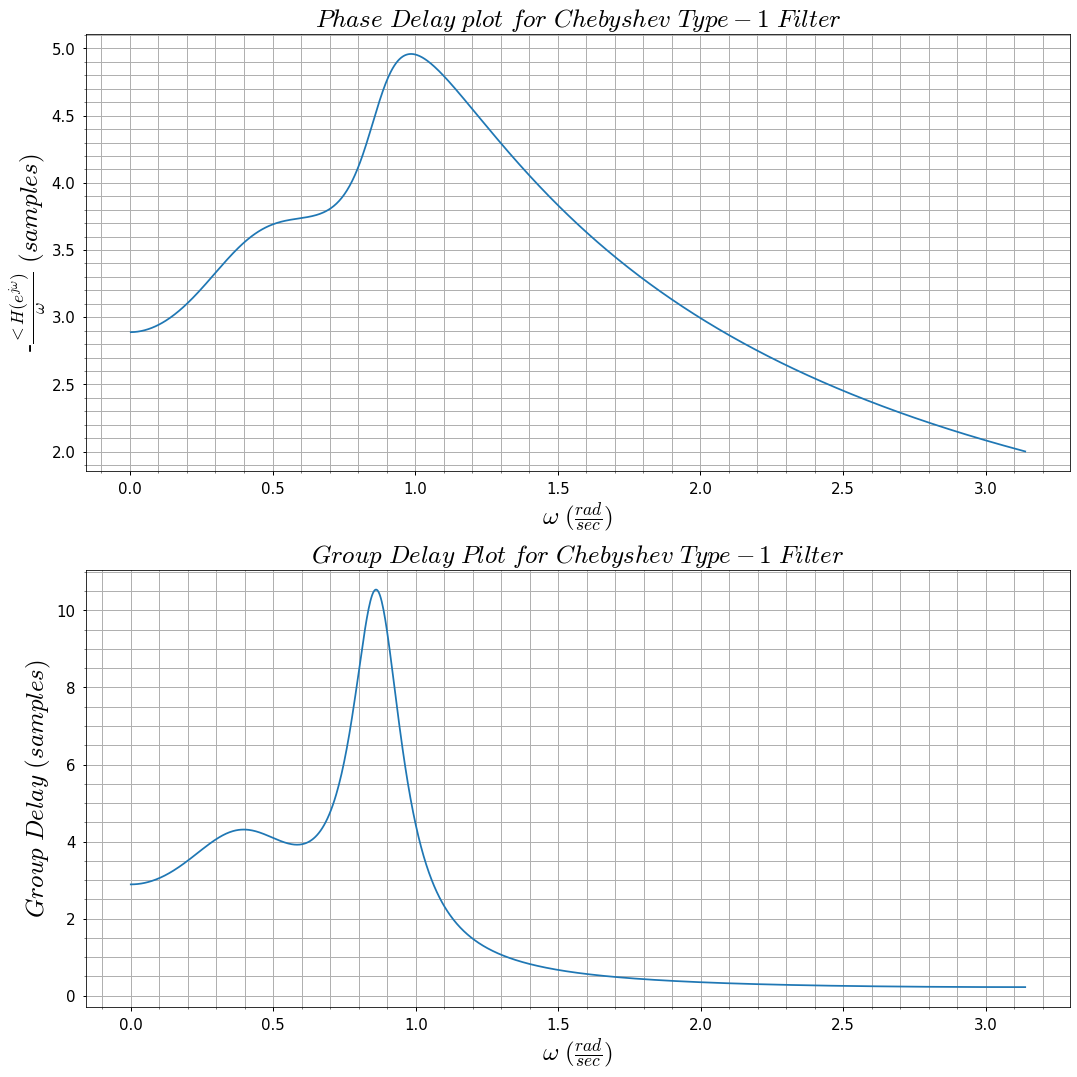

In [12]:
freqs, mags = sp.freqz(nu, dn, 1024)

w1, gd1 = sp.group_delay((nu, dn), 1024)

title = ['$Phase\ Delay\ plot\ for\ Chebyshev\ Type-1\ Filter$', '$Group\ Delay\ Plot\ for\ Chebyshev\ Type-1\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].plot(freqs, -np.unwrap(np.angle(mags))/freqs)
    else:
      axs[row].plot(w1,gd1)

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(freqs, mags, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'-$\frac{<H(e^{j\omega})}{\omega}\ (samples)$', row=0)
plot_signal(w1, gd1, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'$Group\ Delay\ (samples)$', row=1)

fig.savefig('cheb_delay.png')

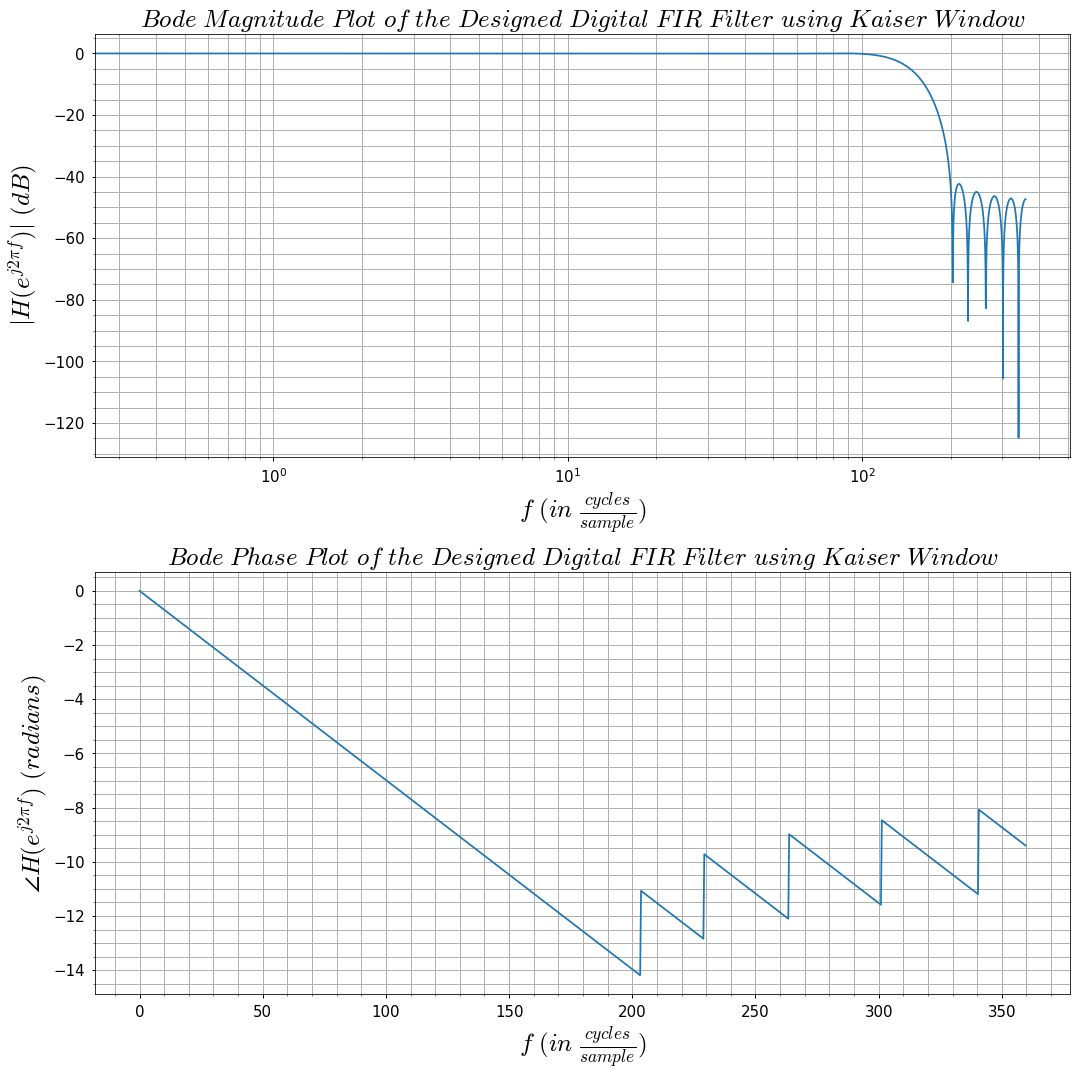

In [13]:
from scipy.signal import kaiserord, firwin, freqz
atten_p = a #passband attenuation in dB
atten_s = 39    #stopband attenuation in dB

F_s = 720
f_p1 = 100
f_s1 = 200
width = f_s1-f_p1
fc = (f_p1 + f_s1)/2


nyq = 0.5*F_s
cutoff = fc/ nyq
width = width/ nyq


m,beta = sp.kaiserord(atten_s,width)
h_k = sp.firwin(m, cutoff, window=('kaiser', beta))
de1=np.zeros(m)
de1[0]=1
w_kaiser,h_kaiser = sp.freqz(h_k,de1,worN=1024)

title = ['$Bode\ Magnitude\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Kaiser\ Window$', '$Bode\ Phase\ Plot\ of\ the\ Designed\ Digital\ FIR\ Filter\ using\ Kaiser\ Window$']
fig4, axs4 = plt.subplots(2, figsize=(15,15))
def plot_bode_1(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs4[row].grid(b=True, which='major', linestyle='-')
    axs4[row].grid(b=True, which='minor', linestyle='-')
    axs4[row].minorticks_on()
    if row == 0:
      axs4[row].semilogx(w_kaiser*(Fs/(2*np.pi)), 20*np.log10(np.abs(h_kaiser)))
    else:
      axs4[row].plot(w_kaiser*(Fs/(2*np.pi)), np.unwrap(np.angle(h_kaiser))) 

    axs4[row].set_title(title[row], fontsize = 25)
    axs4[row].set_xlabel(xaxis_label, fontsize = 25)
    axs4[row].set_ylabel(yaxis_label, fontsize = 25)
    axs4[row].tick_params(axis="both", labelsize = 15)
    fig4.tight_layout()
    
plot_bode_1(w_kaiser, h_kaiser, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$|H(e^{j2\pi f})|\ (dB)$', row=0)
plot_bode_1(w_kaiser, h_kaiser, xaxis_label=r'$f\ (in\ \frac{cycles}{sample})$', yaxis_label=r'$\angle H(e^{j2\pi f})\ (radians)$', row=1)
fig4.savefig('bodekaiser.png')

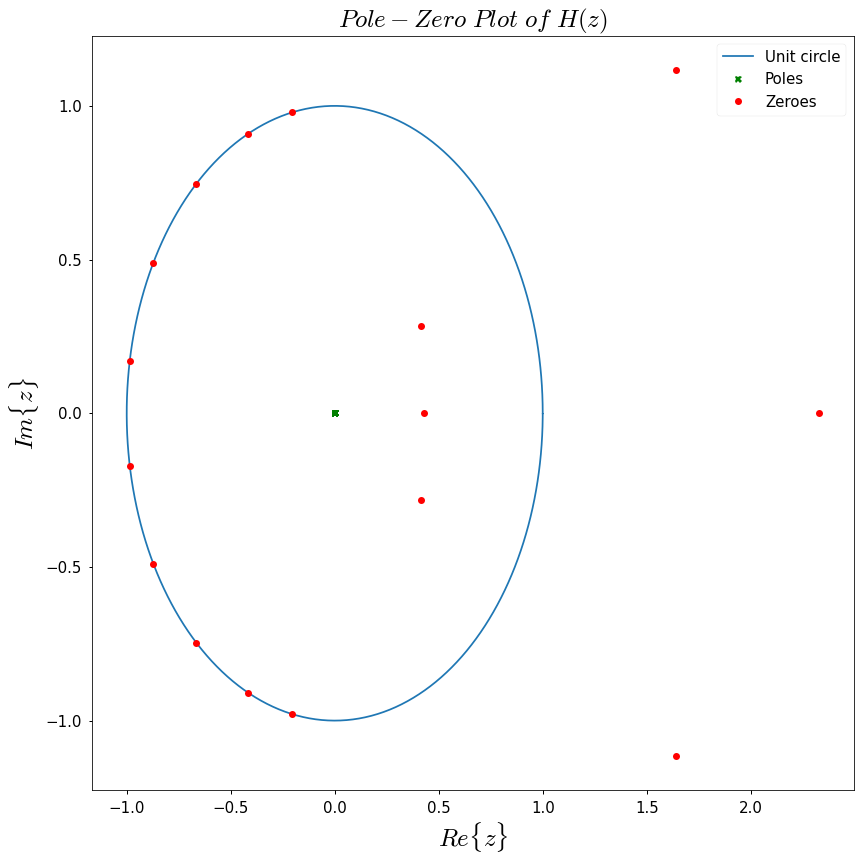

In [14]:
zeroes, poles, gain =sp.tf2zpk(h_k, de1)
#z,p,g =sp.bilinear_zpk(zeroes,poles,gain, fs=F_s)
theta=np.arange(0, 2*np.pi, 0.01)
fig, axs = plt.subplots(figsize=(12,12))
def plot(p, z, xaxis_label=None, yaxis_label=None, row=None):  
    axs.plot(np.cos(theta), np.sin(theta), label='Unit circle')
    axs.plot(np.real(p), np.imag(p), 'gX', label='Poles')
    axs.plot(np.real(z), np.imag(z), 'ro', label='Zeroes')
    axs.legend(loc = 'upper right', fontsize = 15)
    axs.set_title(r'$Pole-Zero\ Plot\ of\ H(z)$', fontsize = 25)
    axs.set_xlabel(xaxis_label, fontsize = 25)
    axs.set_ylabel(yaxis_label, fontsize = 25)
    axs.tick_params(axis="both", labelsize = 15)
    fig.tight_layout()

plot(poles, zeroes, xaxis_label=r'$Re\{z\}$', yaxis_label=r'$Im\{z\}$', row=0)
fig.savefig('pzkaiser.png')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


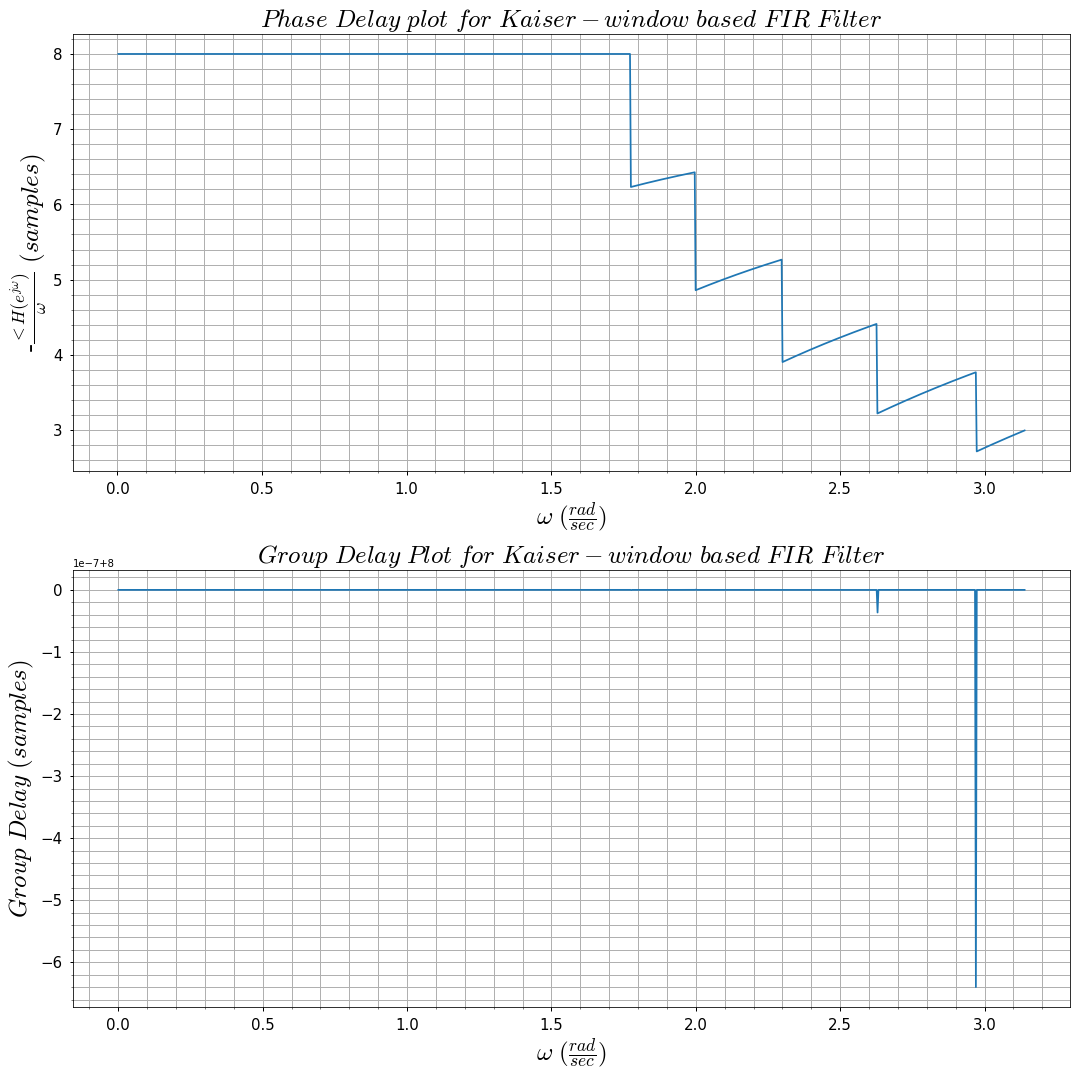

In [15]:
 w, gd = sp.group_delay((h_k, de1), 1024)

title = ['$Phase\ Delay\ plot\ for\ Kaiser-window\ based\ FIR\ Filter$', '$Group\ Delay\ Plot\ for\ Kaiser-window\ based\ FIR\ Filter$']
fig, axs = plt.subplots(2, figsize=(15,15))
def plot_signal(x, y, xaxis_label=None, yaxis_label=None, row=None):  
    axs[row].grid(b=True, which='major', linestyle='-')
    axs[row].grid(b=True, which='minor', linestyle='-')
    axs[row].minorticks_on()
    if row == 0:
      axs[row].plot(w_kaiser, -np.unwrap(np.angle(h_kaiser))/w_kaiser)
    else:
      axs[row].plot(w,gd)

    axs[row].set_title(title[row], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    fig.tight_layout()
    
plot_signal(h_kaiser, w_kaiser, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'-$\frac{<H(e^{j\omega})}{\omega}\ (samples)$', row=0)
plot_signal(w, gd, xaxis_label=r'$\omega\ (\frac{rad}{sec})$', yaxis_label=r'$Group\ Delay\ (samples)$', row=1)

fig.savefig('Kai_delay.png')

Part 3:

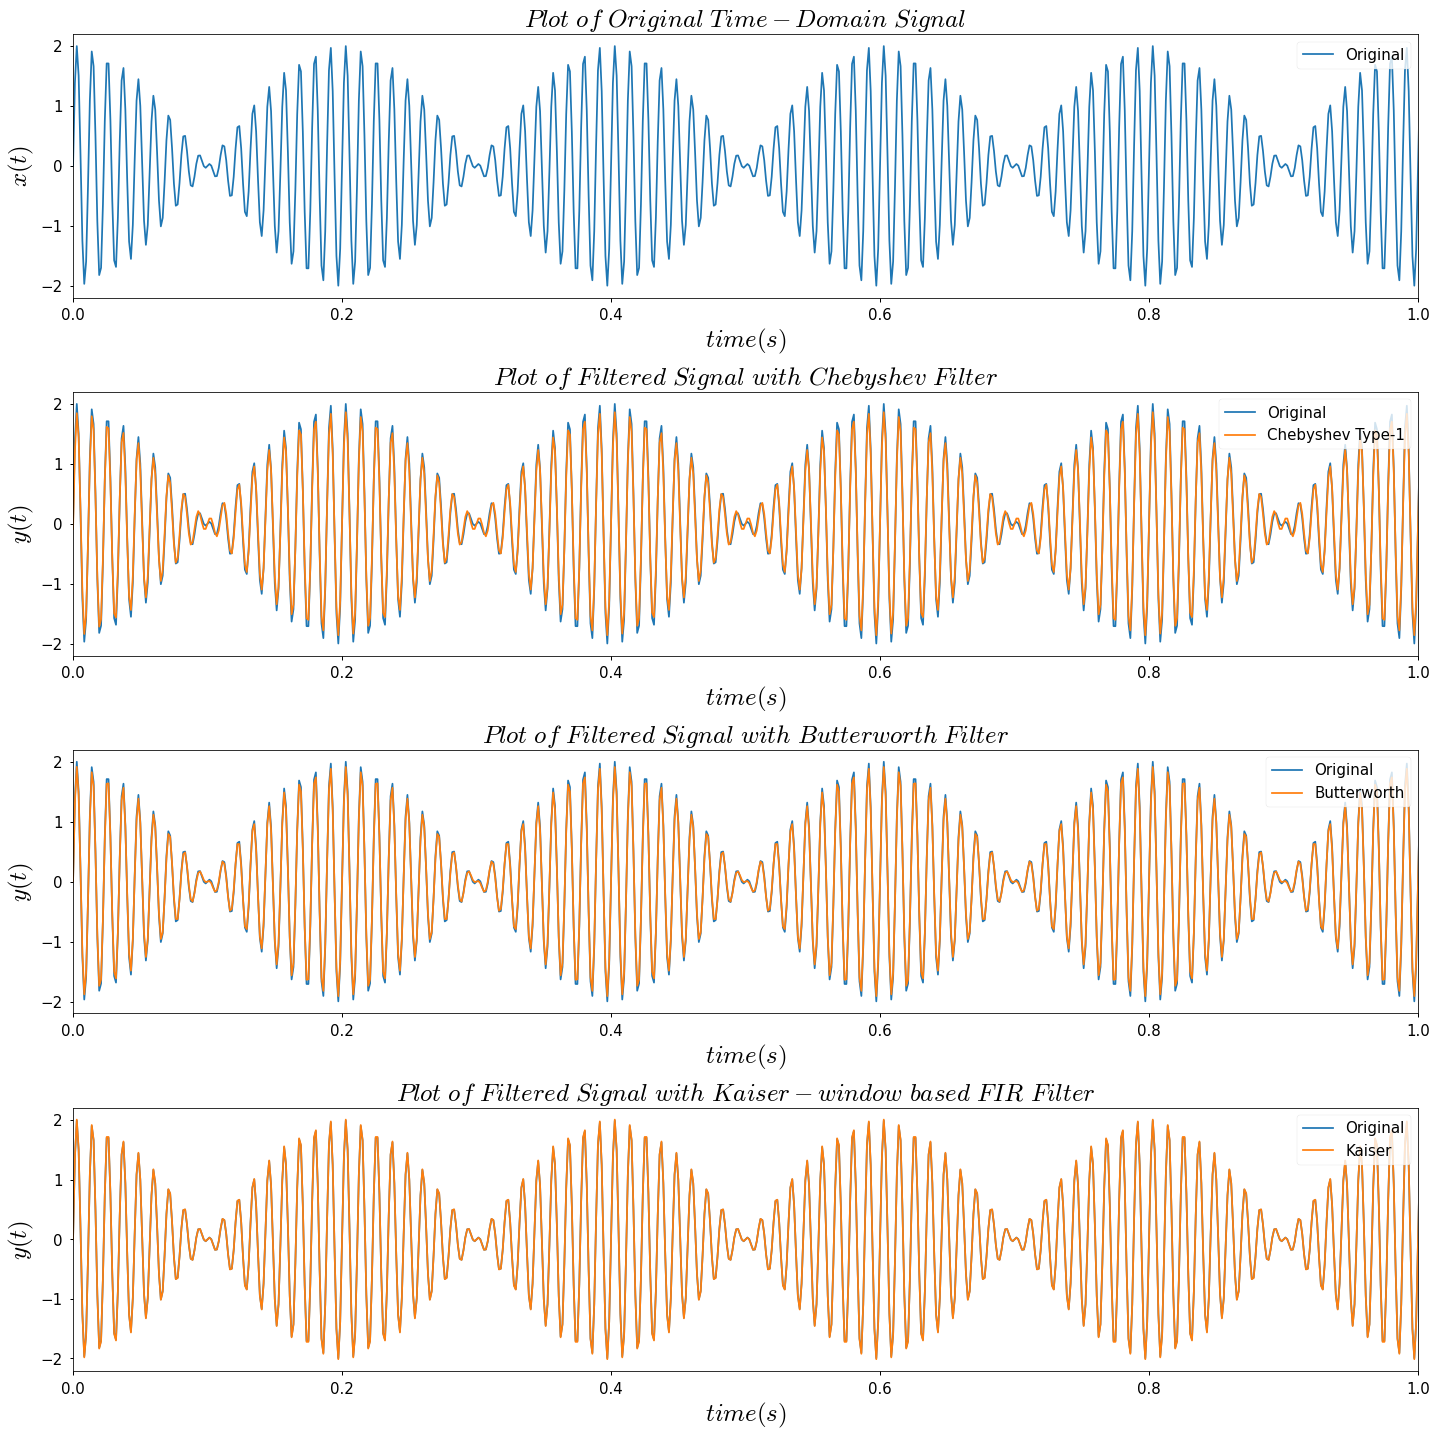

In [16]:
title_i= ['$Plot\ of\ Original\ Time-Domain\ Signal$',
          '$Plot\ of\ Filtered\ Signal\ with\ Chebyshev\ Filter$',
          '$Plot\ of\ Filtered\ Signal\ with\ Butterworth\ Filter$',
          '$Plot\ of\ Filtered\ Signal\ with\ Kaiser-window\ based\ FIR\ Filter$']
lab = ['Original',  'Chebyshev Type-1','Butterworth', 'Kaiser']
fig, axs = plt.subplots(4, figsize=(20,20))
def custom_plot(x, y, xaxis_label=None, yaxis_label=None, row=None, l =None, t=None):  
    axs[row].plot(x, y, label = lab[l])
    axs[row].legend(loc = 'upper right', fontsize = 15)
    axs[row].set_title(title_i[t], fontsize = 25)
    axs[row].set_xlabel(xaxis_label, fontsize = 25)
    axs[row].set_ylabel(yaxis_label, fontsize = 25)
    axs[row].tick_params(axis="both", labelsize = 15)
    axs[row].set_xlim([0,1])
    fig.tight_layout()

dur=10
t=np. linspace(0, dur, int(dur*F_s), endpoint=False) 
x=np.sin(2*np.pi*90*t)+np.sin(2*np.pi*85*t)
y_butt=sp.filtfilt(num, denom, x)
y_cheb=sp.filtfilt(nu, dn, x)
y_ksr=sp.filtfilt(h_k, de1, x)

custom_plot(t, x, xaxis_label=r'$time(s)$', yaxis_label=r'$x(t)$', row=0, l=0, t=0) 

custom_plot(t, x, xaxis_label=r'$time(s)$', yaxis_label=r'$x(t)$', row=1, l=0, t=1)
custom_plot(t, y_cheb, xaxis_label=r'$time(s)$', yaxis_label=r'$y(t)$', row=1, l=1, t=1)

custom_plot(t, x, xaxis_label=r'$time(s)$', yaxis_label=r'$x(t)$', row=2, l=0, t=2)
custom_plot(t, y_butt, xaxis_label=r'$time(s)$', yaxis_label=r'$y(t)$', row=2, l=2, t=2)

custom_plot(t, x, xaxis_label=r'$time(s)$', yaxis_label=r'$x(t)$', row=3, l=0, t=3)
custom_plot(t, y_ksr, xaxis_label=r'$time(s)$', yaxis_label=r'$y(t) $', row=3, l=3, t=3)


plt.savefig('Q1_dist.png')

# **Problem** **2**.
Part 1:

In [22]:
arr=np.array(h_k)
m=len(arr)-1
k=[]
a=[]
b=[]
a.append(arr)
b.append(arr[::-1])
k.append(a[0][-1])
for i in range(0, m-1):
    a.append((a[i]-k[i]*b[i])/(1-k[i]**2))
    a[i+1]=np.delete(a[i+1], -1)
    b.append(a[i+1][::-1])
    k.append(a[i+1][-1])
k=k[::-1]
for i in range(len(k)):
    print('K-parameter value '+ str(i+1)+'=', k[i])


K-parameter value 1= -0.8211183225659427
K-parameter value 2= 0.21825919259149068
K-parameter value 3= 0.35926197685875777
K-parameter value 4= 0.28359107605526573
K-parameter value 5= 0.30737857167711863
K-parameter value 6= 0.42189587908586296
K-parameter value 7= 0.4961278712289537
K-parameter value 8= 0.4664856692674976
K-parameter value 9= 0.30896239817865206
K-parameter value 10= 0.07609466981416411
K-parameter value 11= -0.06207338527417551
K-parameter value 12= -0.04891363081609848
K-parameter value 13= 0.009134806901588048
K-parameter value 14= 0.022290978207824507
K-parameter value 15= 0.003344251468827664
K-parameter value 16= -0.0056123256088886665
